<a href="https://colab.research.google.com/github/Jovver-lit/Data-Analysis/blob/main/202212984%EA%B9%80%EC%9D%80%EC%9A%B0_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-12-97a4d153b21f>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CTPRVN_NM', y='SPORTS_VIEWNG_NMPR_CO', data=data_filtered, ci=None, palette=palette, estimator=sum)


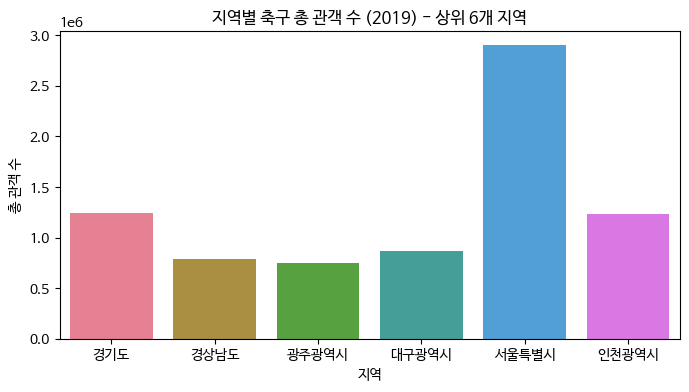

<ipython-input-12-97a4d153b21f>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CTPRVN_NM', y='SPORTS_VIEWNG_NMPR_CO', data=data_filtered, ci=None, palette=palette, estimator=sum)


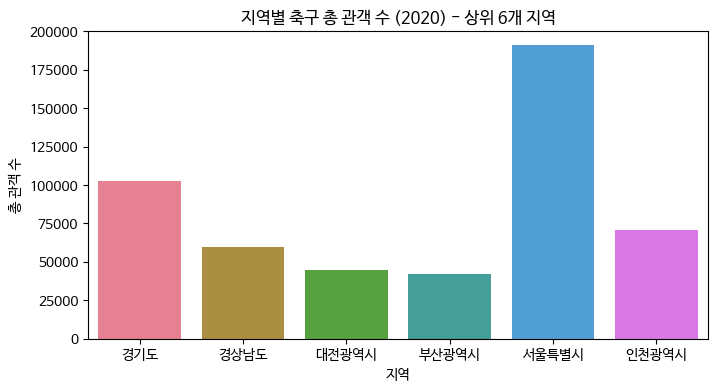

<ipython-input-12-97a4d153b21f>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CTPRVN_NM', y='SPORTS_VIEWNG_NMPR_CO', data=data_filtered, ci=None, palette=palette, estimator=sum)


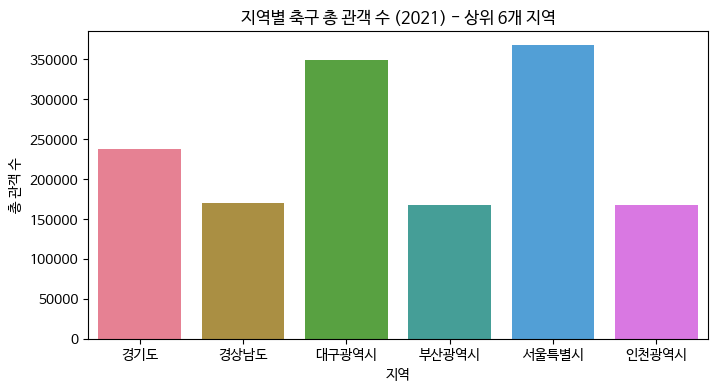

<ipython-input-12-97a4d153b21f>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CTPRVN_NM', y='SPORTS_VIEWNG_NMPR_CO', data=data_filtered, ci=None, palette=palette, estimator=sum)


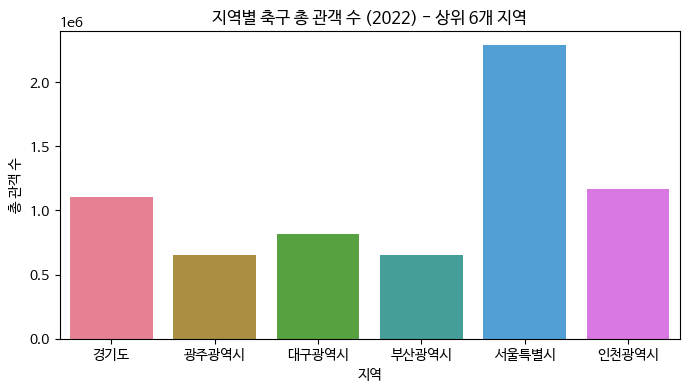

In [12]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/CI_SPORTS_VIEWING_INFO_202302.csv")

plt.rc('font', family='NanumBarunGothic')


target_years = [2019, 2020, 2021, 2022]



for target_year in target_years:
    # 해당 연도 데이터만 추출
    data_target_year = data[data['BASE_YEAR'] == target_year]

    # 지역별 총 관객 수 계산
    total_viewership_by_region = data_target_year.groupby('CTPRVN_NM')['SPORTS_VIEWNG_NMPR_CO'].sum().reset_index()

    # 상위 6개 지역 추출
    top_6_regions = total_viewership_by_region.nlargest(6, 'SPORTS_VIEWNG_NMPR_CO')['CTPRVN_NM']

    # 상위 6개 지역만 추려 데이터 사용
    data_filtered = data_target_year[data_target_year['CTPRVN_NM'].isin(top_6_regions)]

    # 팔레트 지정
    palette = sns.color_palette("husl", n_colors=len(data_filtered['CTPRVN_NM'].unique()))

    # barplot을 사용하여 지역별로 총 관객 수 그래프 그리기
    plt.figure(figsize=(8, 4))
    sns.barplot(x='CTPRVN_NM', y='SPORTS_VIEWNG_NMPR_CO', data=data_filtered, ci=None, palette=palette, estimator=sum)
    plt.title(f'지역별 축구 총 관객 수 ({target_year}) - 상위 6개 지역')
    plt.xlabel('지역')
    plt.ylabel('총 관객 수')
    plt.show()

총 관객수가 높은 지역 6개를 추려 연도별로 그래프를 그려봤다.
먼저, 서울시는 인구가 가장 많은 도시니 일단 제외하고, 대구의 관객 수가 크게 눈에 띄는데 이를 연도별로 다시 살펴 보겠다.

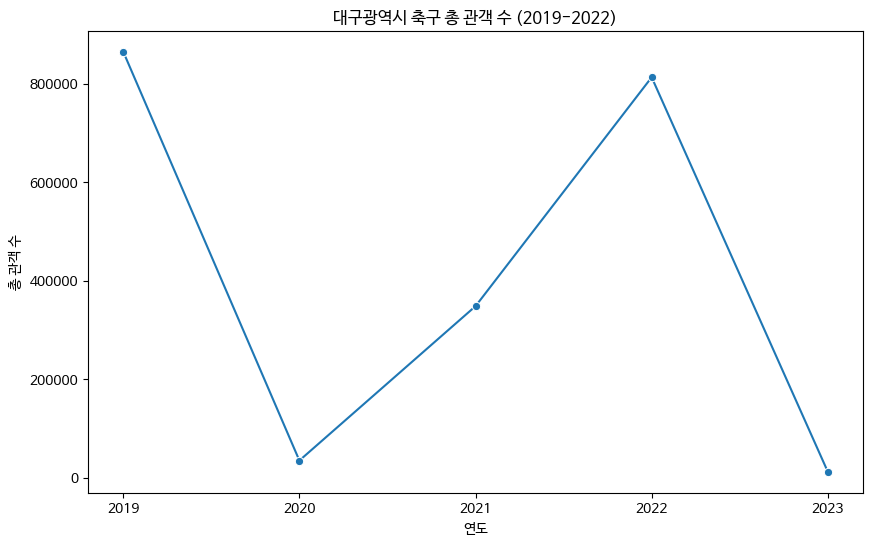

In [18]:
data_daegu = data[data['CTPRVN_NM'] == '대구광역시']

# 연도별로 데이터 그룹화
data_daegu_grouped = data_daegu.groupby(['BASE_YEAR'])['SPORTS_VIEWNG_NMPR_CO'].sum().reset_index()
target_years = [2019, 2020, 2021]

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='BASE_YEAR', y='SPORTS_VIEWNG_NMPR_CO', data=data_daegu_grouped, marker='o')
plt.title('대구광역시 축구 총 관객 수 (2019-2022)')
plt.xlabel('연도')
plt.ylabel('총 관객 수')


plt.xticks(data_daegu_grouped['BASE_YEAR'])

plt.show()

2019년 말에 코로나의 영향으로 크게 추락하였다가, 2021년 부터 크게 상승한 것이 인상적이다.

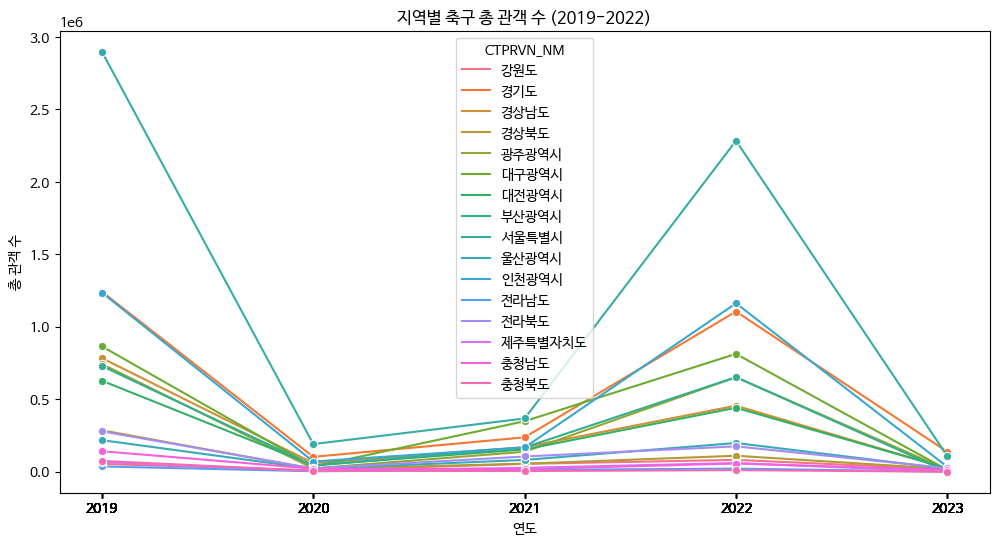

In [20]:
data_grouped = data.groupby(['CTPRVN_NM', 'BASE_YEAR'])['SPORTS_VIEWNG_NMPR_CO'].sum().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(x='BASE_YEAR', y='SPORTS_VIEWNG_NMPR_CO', hue='CTPRVN_NM', data=data_grouped, marker='o')
plt.title('지역별 축구 총 관객 수 (2019-2022)')
plt.xlabel('연도')
plt.ylabel('총 관객 수')
plt.xticks(data_grouped['BASE_YEAR'])

plt.show()

위 그래프는 모든 지역의 관객 추이를 꺾은선으로 나타내었다.

전체적으로 코로나 시기인 2020년에 급락하였다가 2021년부터 관객 수가 점점 회복하는 그래프 모습을 보여주고 있다.

- 이를 통해 전체 지역의 축구 관객수는 회복하는 추이를 보이고 있으며, 이 속도는 점점 빨라지고 있음을 그래프의 기울기를 통해 파악할 수 있다.

